<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.671003,0.001040,52.672043,52.671107,0.000936
1,0.0,1.0,69.673095,-0.000136,79.672959,79.673125,-0.000166
2,0.0,2.0,58.176546,0.000518,68.177064,68.176608,0.000456
3,0.0,3.0,61.542845,-0.000309,71.542537,71.542898,-0.000361
4,0.0,4.0,29.699460,0.002681,39.702141,39.699600,0.002541
...,...,...,...,...,...,...,...
119995,999.0,115.0,26.465375,0.002525,36.467899,36.465527,0.002373
119996,999.0,116.0,92.624010,0.000103,102.624113,102.623912,0.000202
119997,999.0,117.0,87.705290,-0.000105,97.705185,97.705210,-0.000025
119998,999.0,118.0,43.380211,0.000017,53.380228,53.380299,-0.000071


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.671003,0.001040,52.672043,52.671107,0.000936
1,0.0,1.0,69.673095,-0.000136,79.672959,79.673125,-0.000166
2,0.0,2.0,58.176546,0.000518,68.177064,68.176608,0.000456
3,0.0,3.0,61.542845,-0.000309,71.542537,71.542898,-0.000361
4,0.0,4.0,29.699460,0.002681,39.702141,39.699600,0.002541
...,...,...,...,...,...,...,...
119995,999.0,115.0,26.465375,0.002525,36.467899,36.465527,0.002373
119996,999.0,116.0,92.624010,0.000103,102.624113,102.623912,0.000202
119997,999.0,117.0,87.705290,-0.000105,97.705185,97.705210,-0.000025
119998,999.0,118.0,43.380211,0.000017,53.380228,53.380299,-0.000071


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.671003  0.001040   52.672043   52.671107  0.000936
      1.0    69.673095 -0.000136   79.672959   79.673125 -0.000166
      2.0    58.176546  0.000518   68.177064   68.176608  0.000456
      3.0    61.542845 -0.000309   71.542537   71.542898 -0.000361
      4.0    29.699460  0.002681   39.702141   39.699600  0.002541
...                ...       ...         ...         ...       ...
999.0 115.0  26.465375  0.002525   36.467899   36.465527  0.002373
      116.0  92.624010  0.000103  102.624113  102.623912  0.000202
      117.0  87.705290 -0.000105   97.705185   97.705210 -0.000025
      118.0  43.380211  0.000017   53.380228   53.380299 -0.000071
      119.0  26.045665 -0.002664   36.043002   36.045819 -0.002818

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.671003  0.001040   52.672043   52.671107  0.000936
      1.0    69.673095 -0.000136   79.672959   79.673125 -0.000166
      2.0    58.176546  0.000518   68.177064   68.176608  0.000456
      3.0    61.542845 -0.000309   71.542537   71.542898 -0.000361
      4.0    29.699460  0.002681   39.702141   39.699600  0.002541
...                ...       ...         ...         ...       ...
999.0 115.0  26.465375  0.002525   36.467899   36.465527  0.002373
      116.0  92.624010  0.000103  102.624113  102.623912  0.000202
      117.0  87.705290 -0.000105   97.705185   97.705210 -0.000025
      118.0  43.380211  0.000017   53.380228   53.380299 -0.000071
      119.0  26.045665 -0.002664   36.043002   36.045819 -0.002818

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.671003,0.001040,52.672043,52.671107,0.000936
1,0.0,1.0,69.673095,-0.000136,79.672959,79.673125,-0.000166
2,0.0,2.0,58.176546,0.000518,68.177064,68.176608,0.000456
3,0.0,3.0,61.542845,-0.000309,71.542537,71.542898,-0.000361
4,0.0,4.0,29.699460,0.002681,39.702141,39.699600,0.002541
...,...,...,...,...,...,...,...
119995,999.0,115.0,26.465375,0.002525,36.467899,36.465527,0.002373
119996,999.0,116.0,92.624010,0.000103,102.624113,102.623912,0.000202
119997,999.0,117.0,87.705290,-0.000105,97.705185,97.705210,-0.000025
119998,999.0,118.0,43.380211,0.000017,53.380228,53.380299,-0.000071


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.671003  0.001040   52.672043   52.671107  0.000936
      1.0    69.673095 -0.000136   79.672959   79.673125 -0.000166
      2.0    58.176546  0.000518   68.177064   68.176608  0.000456
      3.0    61.542845 -0.000309   71.542537   71.542898 -0.000361
      4.0    29.699460  0.002681   39.702141   39.699600  0.002541
...                ...       ...         ...         ...       ...
999.0 115.0  26.465375  0.002525   36.467899   36.465527  0.002373
      116.0  92.624010  0.000103  102.624113  102.623912  0.000202
      117.0  87.705290 -0.000105   97.705185   97.705210 -0.000025
      118.0  43.380211  0.000017   53.380228   53.380299 -0.000071
      119.0  26.045665 -0.002664   36.043002   36.045819 -0.002818

[120000 rows x 5 columns]

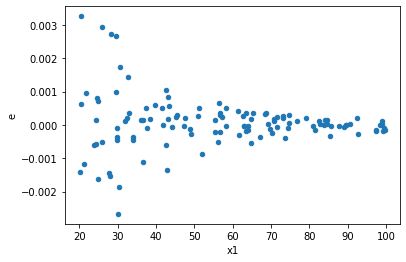

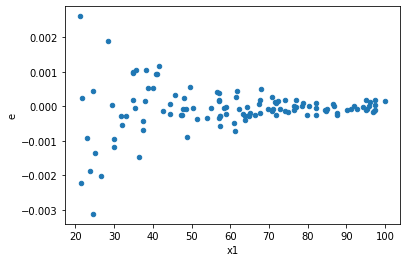

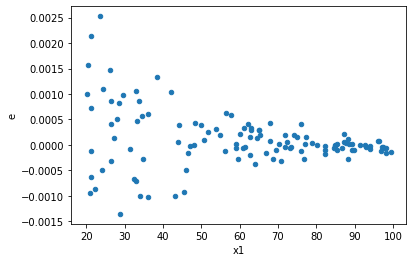

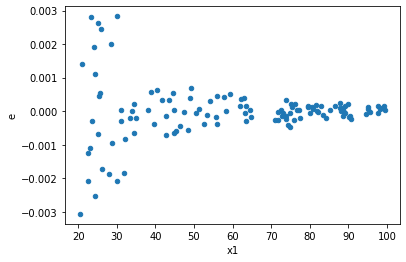

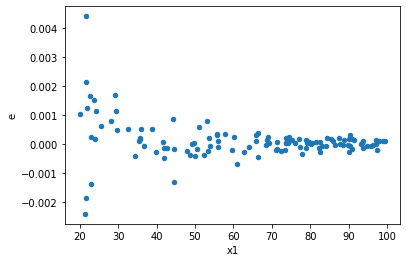

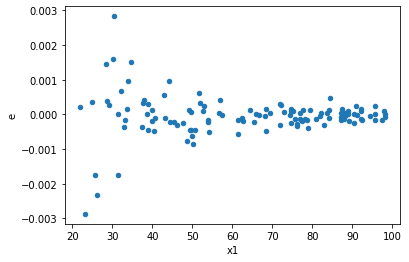

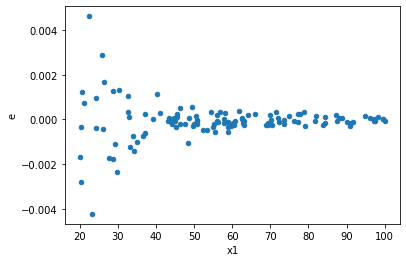

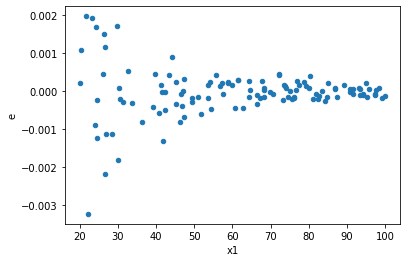

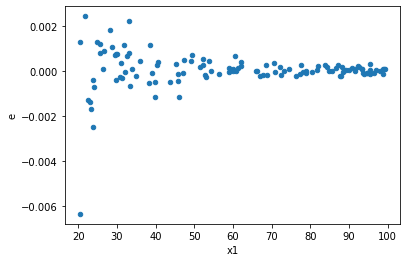

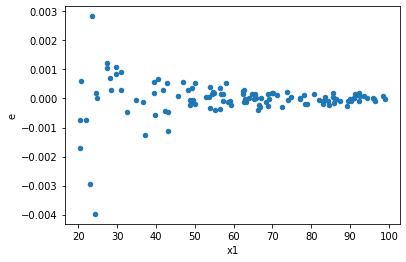

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,7.100295768551783e-05,1.8303616179667137e-06,1.5107012273514432e-06,3.894386421205774e-08,0.025778667222197207,2.390715071502453e-25,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,4.8397770945040775e-05,1.0777220910513046e-06,1.029739807341293e-06,2.2930257256410737e-08,0.02226801090230245,8.942997560742469e-27,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,3.2898325626471705e-05,7.641154421569964e-07,6.999643750313129e-07,1.6257775365042477e-08,0.02322657544437913,2.308270086658476e-26,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,8.356841034121143e-05,1.3142206839937287e-06,1.7780512838555623e-06,2.7962142212632525e-08,0.0157262855500989,3.367350553288262e-30,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,4.7878530311701715e-05,9.471500214963352e-07,1.0186921342915258e-06,2.0152128116943303e-08,0.019782353704889052,6.181999145164083e-28,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,4.20094612442113e-05,1.2371384455590314e-06,8.938183243449212e-07,2.632209458636237e-08,0.02944904335638208,4.6475137031410926e-24,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,9.067496183268382e-05,1.4639595514181401e-06,1.929254507078379e-06,3.114807556208809e-08,0.016145135568068753,6.130364136485421e-30,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,4.779167697823326e-05,1.3597671790357036e-06,1.0168441910262397e-06,2.8931216575227736e-08,0.028451966221126956,2.160918551186398e-24,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,8.552206367756122e-05,8.512028652082214e-07,1.8196183761183238e-06,1.811069925974939e-08,0.009953020642923926,9.333881238411879e-35,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64